In [63]:
import pandas as pd
import numpy as np
import chardet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [64]:
df_raw = pd.read_csv('./data/dongseo_date.csv', index_col = False)
print(df_dongseo)

             기온         습도  전운량(10분위)  일조(hr)    일사량    MWh/MW
0      4.779167  62.541667   9.000000     0.1   3.86  2.885820
1      7.925000  66.291667   8.291667     0.0   2.17  1.103505
2      9.012500  66.625000   7.083333     0.5   4.96  1.993542
3      7.937500  66.625000   2.125000     6.1  10.10  3.924361
4      8.320833  62.625000   5.208333     5.2   9.79  3.218501
5     13.904167  61.875000   9.958333     0.0   1.30  0.409498
6     19.508333  71.083333   8.916667     2.6   8.37  0.664413
7      8.620833  69.833333   9.041667     0.1   2.03  1.380910
8      7.358333  65.583333   9.541667     0.0   3.75  0.897673
9      7.933333  62.916667   4.958333     7.8  11.44  3.944648
10     8.154167  59.708333   8.833333     0.4   4.78  1.193808
11     7.479167  58.958333   8.916667     0.2   3.32  1.600684
12     7.112500  55.791667   8.875000     1.2   5.47  2.536803
13     4.700000  74.083333   8.958333     0.5   1.52  0.958382
14     5.770833  61.583333   8.291667     0.0   3.50  2

In [65]:
df_dongseo= df_raw.drop(columns = ['강수량(mm)', '적설(cm)','날짜'])
count = (df_dongseo['일사량'] > 10).sum()
print(count)
print(df_dongseo)


699
             기온         습도  전운량(10분위)  일조(hr)    일사량    MWh/MW
0      4.779167  62.541667   9.000000     0.1   3.86  2.885820
1      7.925000  66.291667   8.291667     0.0   2.17  1.103505
2      9.012500  66.625000   7.083333     0.5   4.96  1.993542
3      7.937500  66.625000   2.125000     6.1  10.10  3.924361
4      8.320833  62.625000   5.208333     5.2   9.79  3.218501
5     13.904167  61.875000   9.958333     0.0   1.30  0.409498
6     19.508333  71.083333   8.916667     2.6   8.37  0.664413
7      8.620833  69.833333   9.041667     0.1   2.03  1.380910
8      7.358333  65.583333   9.541667     0.0   3.75  0.897673
9      7.933333  62.916667   4.958333     7.8  11.44  3.944648
10     8.154167  59.708333   8.833333     0.4   4.78  1.193808
11     7.479167  58.958333   8.916667     0.2   3.32  1.600684
12     7.112500  55.791667   8.875000     1.2   5.47  2.536803
13     4.700000  74.083333   8.958333     0.5   1.52  0.958382
14     5.770833  61.583333   8.291667     0.0   3.5

In [66]:
df_dongseo =  df_dongseo.rename(columns={'전운량(10분위)':'전운량','일조(hr)':'일조'})
print(df_dongseo)

             기온         습도        전운량    일조    일사량    MWh/MW
0      4.779167  62.541667   9.000000   0.1   3.86  2.885820
1      7.925000  66.291667   8.291667   0.0   2.17  1.103505
2      9.012500  66.625000   7.083333   0.5   4.96  1.993542
3      7.937500  66.625000   2.125000   6.1  10.10  3.924361
4      8.320833  62.625000   5.208333   5.2   9.79  3.218501
5     13.904167  61.875000   9.958333   0.0   1.30  0.409498
6     19.508333  71.083333   8.916667   2.6   8.37  0.664413
7      8.620833  69.833333   9.041667   0.1   2.03  1.380910
8      7.358333  65.583333   9.541667   0.0   3.75  0.897673
9      7.933333  62.916667   4.958333   7.8  11.44  3.944648
10     8.154167  59.708333   8.833333   0.4   4.78  1.193808
11     7.479167  58.958333   8.916667   0.2   3.32  1.600684
12     7.112500  55.791667   8.875000   1.2   5.47  2.536803
13     4.700000  74.083333   8.958333   0.5   1.52  0.958382
14     5.770833  61.583333   8.291667   0.0   3.50  2.007446
15     6.170833  57.0416

In [67]:
X = df_dongseo.drop(columns=['MWh/MW'])
y = df_dongseo['MWh/MW']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
param_grid = {
    'n_estimators':[100,200,400],
    #already done 0.05,0.2
    'learning_rate':[0.1,0.05,0.2],
    #already done 3,6,11
    'max_depth':[3,6,9],
    # 'subsample' :[0.6,0.8,1.0],
    # 'min_child_weight': [1, 5, 10],
    # 'colsample_bytree': [0.6, 0.8, 1.0],

}

model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv = 5, verbose=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.580 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.588 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.513 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.617 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.536 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=-0.572 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=-0.601 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=-0.523 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=-0.631 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=-0.5

In [69]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predictions = predictions.sample(frac=0.5)
predictions = predictions.sort_index()
print(predictions)

Mean Squared Error (MSE): 0.30187946999440773
Mean Absolute Error (MAE): 0.44707139050597683
Root Mean Squared Error (RMSE): 0.5494355922166017
R-squared (R2): 0.8876255158262183
        Actual  Predicted
10    1.193808   1.724041
44    4.997577   4.354583
54    4.448581   4.626104
56    1.898232   1.254501
58    0.428257   1.004353
66    5.049089   5.717693
67    0.705483   0.961833
78    6.287086   6.087152
109   5.001342   4.400915
113   6.729189   6.254532
139   6.557313   5.829950
141   4.904004   5.683751
156   4.081437   4.592970
168   0.586823   0.873092
174   0.433124   1.132002
184   1.324720   1.493405
198   1.542664   1.692301
199   1.894771   2.517773
209   3.514629   4.146396
218   1.604091   1.190840
231   5.027623   4.907572
237   0.395844   0.069546
244   0.155561   0.812955
260   1.283139   1.426516
275   3.034517   3.291818
280   3.818816   2.979729
286   4.919169   5.125104
289   4.892349   5.059834
296   4.453020   3.575550
307   4.855767   4.605526
318   2.411961 

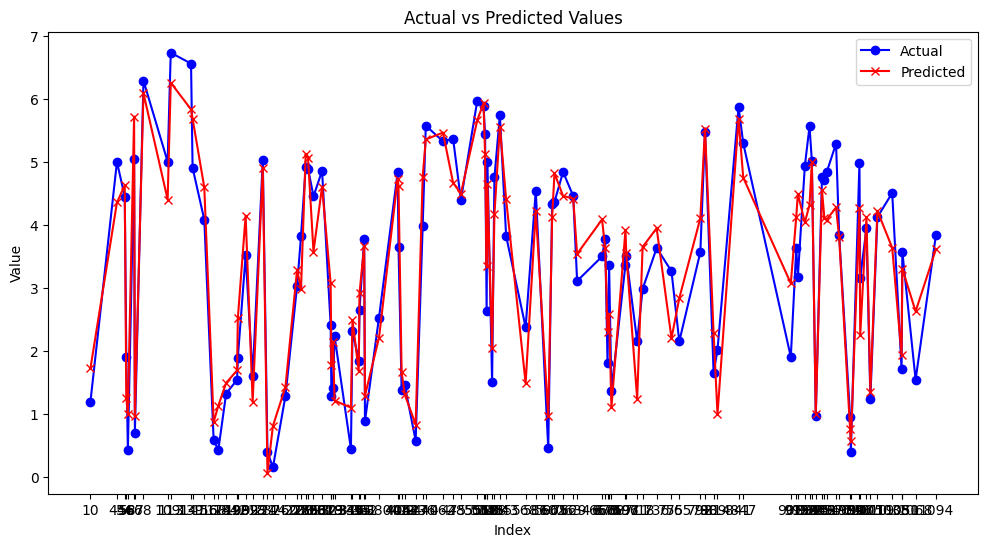

In [70]:
# 꺾은선 그래프 생성
plt.figure(figsize=(12, 6))

# Actual 값 꺾은선 그래프
plt.plot(predictions.index, predictions['Actual'], label='Actual', color='b', marker='o')

# Predicted 값 꺾은선 그래프
plt.plot(predictions.index, predictions['Predicted'], label='Predicted', color='r', marker='x')

# 그래프 설정
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.xticks(predictions.index)
plt.legend()

# 그래프 출력
plt.show()

<h2>KOREA_CLIMATE_DATASET에 PREDICTION 적용<h2>

In [90]:
raw_climate = pd.read_csv('./data/climate/korea_climate_irradiance.csv')
print(raw_climate.head())

   지점 지점명          일시  평균기온(°C)  평균 상대습도(%)  합계 일조시간(hr)  합계 일사량(MJ/m2)  \
0  90  속초  2014-12-01       1.9        39.3          8.6       9.593059   
1  90  속초  2014-12-02      -3.7        26.5          8.9      11.134921   
2  90  속초  2014-12-03       0.3        37.1          8.2      10.280556   
3  90  속초  2014-12-04      -1.3        29.5          9.0      10.913384   
4  90  속초  2014-12-05      -3.0        31.3          9.0      10.932026   

   평균 전운량(1/10)  
0           3.4  
1           0.3  
2           1.6  
3           0.8  
4           0.0  


In [91]:
korea_climate = raw_climate.rename(columns={'평균기온(°C)':'기온', '평균 상대습도(%)':'습도', '합계 일조시간(hr)':'일조', '합계 일사량(MJ/m2)': '일사량', '평균 전운량(1/10)':'전운량'  })
korea_climate = korea_climate.drop(columns= ['지점명','지점','일시'])
missing_rows_count = korea_climate.isna().any(axis=1).sum
korea_climate = korea_climate.interpolate()
new_order = ['기온', '습도', '전운량', '일조', '일사량']
korea_climate = korea_climate[new_order]
print(korea_climate.shape[0])
print(korea_climate.head())

315026
    기온    습도  전운량   일조        일사량
0  1.9  39.3  3.4  8.6   9.593059
1 -3.7  26.5  0.3  8.9  11.134921
2  0.3  37.1  1.6  8.2  10.280556
3 -1.3  29.5  0.8  9.0  10.913384
4 -3.0  31.3  0.0  9.0  10.932026


In [98]:
raw_climate['MW/MWh'] = best_model.predict(korea_climate)
print(raw_climate.head())
raw_climate.to_csv('./data/climate/korea_climate_final',index = False)
    


   지점 지점명          일시  평균기온(°C)  평균 상대습도(%)  합계 일조시간(hr)  합계 일사량(MJ/m2)  \
0  90  속초  2014-12-01       1.9        39.3          8.6       9.593059   
1  90  속초  2014-12-02      -3.7        26.5          8.9      11.134921   
2  90  속초  2014-12-03       0.3        37.1          8.2      10.280556   
3  90  속초  2014-12-04      -1.3        29.5          9.0      10.913384   
4  90  속초  2014-12-05      -3.0        31.3          9.0      10.932026   

   평균 전운량(1/10)    MW/MWh  
0           3.4  4.306335  
1           0.3  4.637568  
2           1.6  4.353876  
3           0.8  4.637568  
4           0.0  4.637568  
